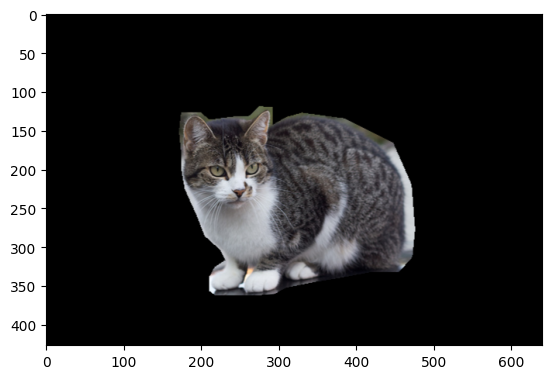

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Read the image
image_path = 'translated_image_10/category_17/650_0.png'
image = mpimg.imread(image_path)
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


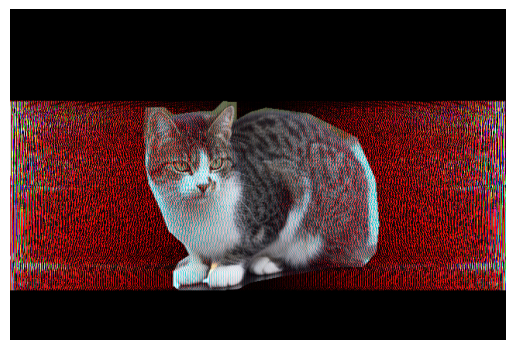

In [2]:
import torch
x = torch.tensor(image)

fourier_encoding = torch.fft.fftn(x, dim=(-2, -1))

x = x + fourier_encoding.real

encoded_img = x.numpy()

plt.imshow(encoded_img)
plt.axis('off')
plt.show()


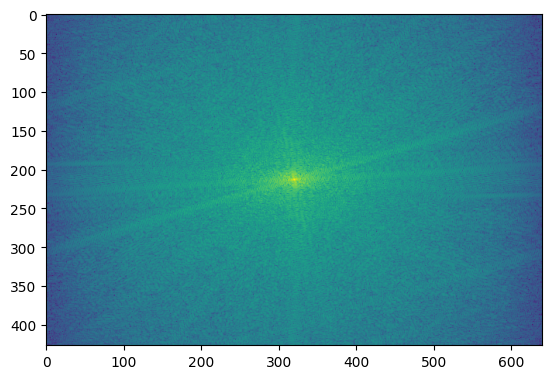

In [3]:
import cv2
import numpy as np


num_patterns = 3  # Number of patterns to add
frequencies = [50, 100, 200]  # Frequencies of the patterns
orientations = [0, np.pi/4, np.pi/2]  # Orientations of the patterns (in radians)

# Read the image

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude of the Fourier Transform
plt.imshow(magnitude)

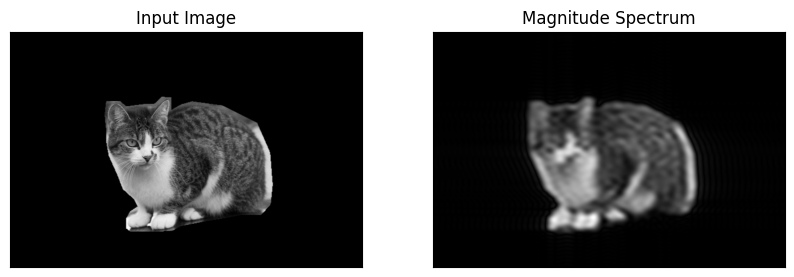

In [4]:
image = cv2.imread(image_path, 0)

# calculating the discrete Fourier transform
DFT = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
row, col = image.shape
center_row, center_col = row // 2, col // 2

# create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1

# put the mask and inverse DFT in place.
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)

# calculate the magnitude of the inverse DFT
imageThen = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])

# visualize the original image and the magnitude spectrum
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageThen, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import transforms
import numpy as np

class LaplacianEncoder(nn.Module):
    def __init__(self):
        super(LaplacianEncoder, self).__init__()
        self.laplacian_filter = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)
        laplacian_kernel = torch.tensor([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=torch.float32)
        laplacian_kernel = laplacian_kernel.unsqueeze(0).unsqueeze(0)
        self.laplacian_filter.weight = nn.Parameter(laplacian_kernel)

    def forward(self, x):
        # Apply Laplacian filter convolution
        laplacian_encoding = F.conv2d(x, self.laplacian_filter.weight.to(x.device), padding=1)
        # Combine with original image
        encoded_image = x + laplacian_encoding
        return encoded_image

# Load the image
image_path = 'translated_image_10/category_17/650_0.png'
img = mpimg.imread(image_path)

# Convert the image to grayscale using torchvision.transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.ToTensor()
])
img_gray = transform(img)

# Convert the image to a PyTorch tensor
x = img_gray.unsqueeze(0)

# Create the Laplacian encoder model
encoder = LaplacianEncoder()

# Apply Laplacian encoding
encoded_img = encoder(x)

# Convert the resulting tensor back to an image
encoded_img = (encoded_img.squeeze(0).permute(1, 2, 0) * 255.0).detach().numpy().clip(0, 255).astype(np.uint8)

# Plot both original and encoded images side by side
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img_gray.squeeze(0), cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])

# Plot encoded image
plt.subplot(1, 2, 2)
plt.imshow(encoded_img.squeeze(), cmap='gray')
plt.title('Encoded Image')
plt.xticks([])
plt.yticks([])

plt.show()


TypeError: Input type float32 is not supported

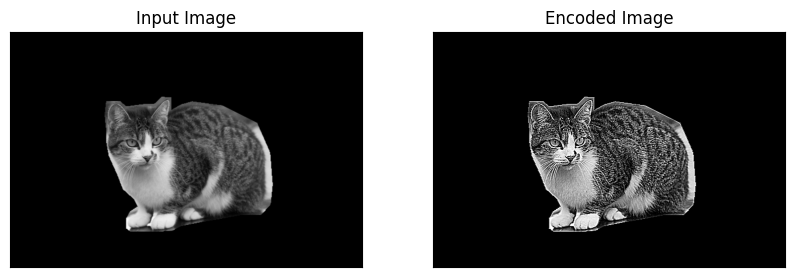

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import transforms
import numpy as np

class LaplacianEncoder(nn.Module):
    def __init__(self):
        super(LaplacianEncoder, self).__init__()
        self.laplacian_filter = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)
        laplacian_kernel = torch.tensor( [[-1, -1, -1],
                                         [-1,  8, -1],
                                         [-1, -1, -1]], dtype=torch.float32)
        laplacian_kernel = laplacian_kernel.unsqueeze(0).unsqueeze(0)
        self.laplacian_filter.weight = nn.Parameter(laplacian_kernel)

    def forward(self, x):
        # Apply Laplacian filter convolution
        laplacian_encoding = F.conv2d(x, self.laplacian_filter.weight.to(x.device), padding=1)
        # Combine with original image
        encoded_image = x + laplacian_encoding
        return encoded_image

# Load the image
image_path = 'translated_image_10/category_17/650_0.png'
img = mpimg.imread(image_path)
img = (img * 255).astype(np.uint8)

# Convert the image to grayscale using torchvision.transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.ToTensor()
])
img_gray = transform(img)

# Convert the image to a PyTorch tensor
x = img_gray.unsqueeze(0)

# Create the Laplacian encoder model
encoder = LaplacianEncoder()

# Apply Laplacian encoding
encoded_img = encoder(x)

# Convert the resulting tensor back to an image
encoded_img = (encoded_img.squeeze(0).permute(1, 2, 0) * 255.0).detach().numpy().clip(0, 255).astype(np.uint8)

# Plot both original and encoded images side by side
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img_gray.squeeze(0), cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])

# Plot encoded image
plt.subplot(1, 2, 2)
plt.imshow(encoded_img.squeeze(), cmap='gray')
plt.title('Encoded Image')
plt.xticks([])
plt.yticks([])

plt.show()


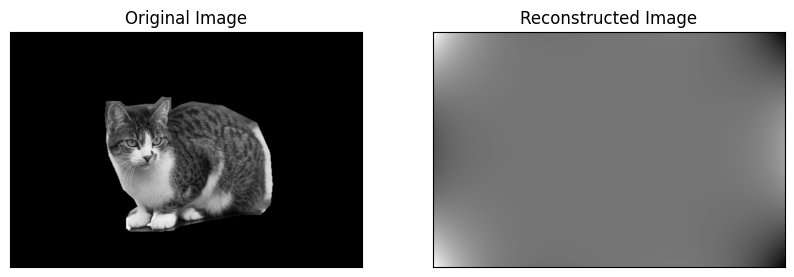

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import transforms
import numpy as np

# Define the ZernikeEncodingLayer class, adjust_channels, znl, center_of_mass, and zernike_moments functions as provided previously

class ZernikeEncodingLayer(nn.Module):
    def __init__(self, out_channels=25, max_order=8):
        super(ZernikeEncodingLayer, self).__init__()
        self.max_order = max_order
        self.out_channels = out_channels

    def forward(self, x):
        x_normalized = (x - torch.min(x)) / (torch.max(x) - torch.min(x))
        if x.size(1) > 1:
            x_normalized = torch.mean(x_normalized, dim=1, keepdim=True)

        # Compute Zernike moments
        zernike_features = []
        for i in range(x_normalized.size(0)):
            image = x_normalized[i, 0, :, :].detach().cpu().numpy()  # Detach from computation graph
            moments = zernike_moments(image, radius=8, degree=self.max_order)
            moments = adjust_channels(moments, self.out_channels)
            zernike_features.append(moments.flatten())
        zernike_features = torch.tensor(zernike_features).to(x.device)

        return zernike_features

class ZernikeDecodingLayer(nn.Module):
    def __init__(self, in_channels=25, max_order=8):
        super(ZernikeDecodingLayer, self).__init__()
        self.max_order = max_order
        self.in_channels = in_channels

    def forward(self, zernike_features, image_shape):
        reconstructed_images = []
        for i in range(zernike_features.size(0)):
            moments = zernike_features[i].detach().cpu().numpy().reshape(self.in_channels, -1)
            reconstructed_image = reconstruct_image(moments, image_shape, radius=8, degree=self.max_order)
            reconstructed_images.append(reconstructed_image)
        return torch.tensor(reconstructed_images).to(zernike_features.device)

def reconstruct_image(zernike_features, image_shape, radius, degree=8):
    """
    Reconstruct the image from Zernike moments.

    Parameters:
        zernike_features (ndarray): Zernike moments.
        image_shape (tuple): Shape of the original image.
        radius (int): Maximum radius for the Zernike polynomials, in pixels.
        degree (int): Maximum degree used for computing Zernike moments (default: 8).

    Returns:
        ndarray: Reconstructed image.
    """
    reconstructed_image = np.zeros(image_shape)
    height, width = image_shape
    Y, X = np.mgrid[:height, :width]

    def zernike_polynomial(n, m, rho, theta):
        """
        Compute the Zernike polynomial Z_n^m(rho, theta).

        Parameters:
            n (int): Radial degree of the Zernike polynomial.
            m (int): Azimuthal order of the Zernike polynomial.
            rho (ndarray): Normalized radial coordinates.
            theta (ndarray): Azimuthal coordinates.

        Returns:
            ndarray: Value of the Zernike polynomial.
        """
        R = np.zeros_like(rho)
        for k in range((n - abs(m)) // 2 + 1):
            R += (-1) ** k * np.math.factorial(n - k) / (
                np.math.factorial(k)
                * np.math.factorial((n + abs(m)) // 2 - k)
                * np.math.factorial((n - abs(m)) // 2 - k)
            ) * rho ** (n - 2 * k)
        return R * np.exp(1j * m * theta)

    Yc = (Y - height / 2) / radius
    Xc = (X - width / 2) / radius
    rho = np.sqrt(Xc ** 2 + Yc ** 2)
    theta = np.arctan2(Yc, Xc)

    for n in range(degree + 1):
        for m in range(-n, n + 1, 2):
            idx = (n * (n + 1)) // 2 + m
            if idx >= zernike_features.shape[0]:
                break
            Z = zernike_features[idx]
            Zernike = zernike_polynomial(n, m, rho, theta)
            reconstructed_image += Z * Zernike.real

    return reconstructed_image

img = (img * 255).astype(np.uint8)

# Load the image
image_path = 'translated_image_10/category_17/650_0.png'
img = mpimg.imread(image_path)
img = (img * 255).astype(np.uint8)


# Convert the image to grayscale using torchvision.transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.ToTensor()
])
img_gray = transform(img)

# Convert the image to a PyTorch tensor
x = img_gray.unsqueeze(0)

# Create the Zernike encoding layer
encoder = ZernikeEncodingLayer(out_channels=25, max_order=8)

# Apply Zernike encoding
encoded_img = encoder(x)

# Create the Zernike decoding layer
decoder = ZernikeDecodingLayer(in_channels=25, max_order=8)

# Reconstruct the image
reconstructed_img = decoder(encoded_img, img_gray.squeeze(0).shape)

# Plot both original and reconstructed images side by side
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img_gray.squeeze(0), cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

# Plot reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img[0], cmap='gray')  # Remove the batch dimension
plt.title('Reconstructed Image')
plt.xticks([])
plt.yticks([])

plt.show()


(427, 640)


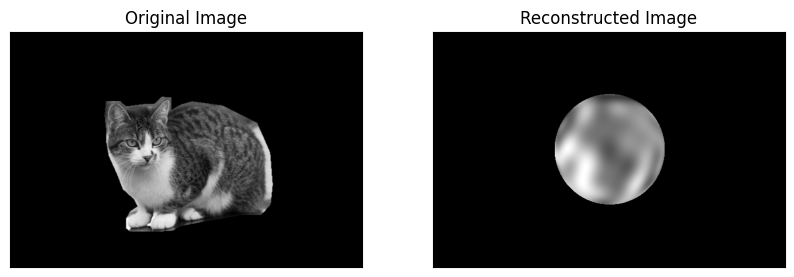

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from matplotlib import cm


def _slow_zernike_poly(Y,X,n,l):
    def _polar(r,theta):
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        return 1.*x+1.j*y

    def _factorial(n):
        if n == 0: return 1.
        return n * _factorial(n - 1)
    
    vxy = np.zeros(Y.size, dtype=complex)
    index = 0
    for x,y in zip(X,Y):
        Vnl = 0.
        for m in range( int( (n-l)//2 ) + 1 ):
            Vnl += (-1.)**m * _factorial(n-m) /  \
                ( _factorial(m) * _factorial((n - 2*m + l) // 2) * _factorial((n - 2*m - l) // 2) ) * \
                ( np.sqrt(x*x + y*y)**(n - 2*m) * _polar(1.0, l*np.arctan2(y,x)) )
        vxy[index] = Vnl
        index = index + 1

    return vxy

def zernike_reconstruct(img, radius, D, cof):

    idx = np.ones(img.shape)

    cofy,cofx = cof
    cofy = float(cofy)
    cofx = float(cofx)
    radius = float(radius)    

    Y,X = np.where(idx > 0)
    P = img[Y,X].ravel()
    Yn = ( (Y -cofy)/radius).ravel()
    Xn = ( (X -cofx)/radius).ravel()

    k = (np.sqrt(Xn**2 + Yn**2) <= 1.)
    frac_center = np.array(P[k], np.double)
    Yn = Yn[k]
    Xn = Xn[k]
    frac_center = frac_center.ravel()

    npix = float(frac_center.size)

    reconstr = np.zeros(img.size, dtype=complex)
    accum = np.zeros(Yn.size, dtype=complex)

    for n in range(D+1):
        for l in range(n+1):
            if (n-l)%2 == 0:
                vxy = _slow_zernike_poly(Yn, Xn, float(n), float(l))
                a = sum(frac_center * np.conjugate(vxy)) * (n + 1)/npix
                accum += a * vxy
    reconstr[k] = accum
    return reconstr

# Load the image
image_path = 'translated_image_10/category_17/650_0.png'
img = mpimg.imread(image_path)

# Convert the image to grayscale
img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

# Set parameters
rows, cols = img_gray.shape
print(img_gray.shape)
radius = cols//2 if rows > cols else rows//2
radius = 100  # Maximum radius for the Zernike polynomials, in pixels
D = 12  # Maximum degree to use
cof = (img_gray.shape[0] / 2, img_gray.shape[1] / 2)  # Center of the image

# Reconstruct the image using Zernike moments
reconstructed_img = zernike_reconstruct(img_gray, radius, D, cof)
reconstructed_img = reconstructed_img.reshape(img_gray.shape)


# Plot original and reconstructed images side by side
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap=cm.gray)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

# Plot reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img.real, cmap=cm.gray)
plt.title('Reconstructed Image')
plt.xticks([])
plt.yticks([])


plt.show()
